# Key Analyses
This document is for some additional analyses and prettifying, summarizing existing analyses for the purpose of publishing a blog.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context("paper") # setting the scale of graphs
sns.set_style("darkgrid") # setting the style of graphs

In [33]:
#loading data
df = pd.read_csv('data/profit_data.csv', index_col = 0)

In [34]:
# simplified df (keeping only what I need)
df = df[['title', 'new_genre', 'primary_genre', 'secondary_genre', 'MPAA', 'month', 'year', 'popularity', 'avg_rating_imdb',
   'production_budget', 'domestic_gross', 'worldwide_gross', 'domestic_gross_z', 'worldwide_gross_z']].copy()

In [35]:
df.rename(columns={'new_genre': 'genre', 'avg_rating_imdb': 'avg_rating', 'production_budget': 'budget', 
                  'domestic_gross':'dom_gross', 'worldwide_gross': 'glob_gross'}, inplace = True)

For genres with less than 10 data points, we will try to reassign to appropriate genre with higher data counts.

Shuffling some of the genre information.  
I'll follow couple rules I set as below. 
1. If primary or secondary genre is horror, the movie is horror.
2. If primary or secondary genre is documentary, the movie is documentary.
3. If primary or secondary genre is animation, the movie is animation.
4. If primary or secondary genre is family, the movie is family.

4. If non-horror movie is 'crime drama' or 'thriller', it should be 'thriller'.
4. 

In [54]:
conditions = [
    (df.primary_genre == 'Horror') | (df.secondary_genre == 'Horror'), 
    (df.primary_genre == 'Documentary') | (df.secondary_genre == 'Documentary'), 
    (df.primary_genre == 'Animation') | (df.secondary_genre == 'Animation'), 
    (df.primary_genre == 'Family') | (df.secondary_genre == 'Family'), 
]
vals = ['Horror', 'Documentary', 'Animation', 'Family']
df.genre = np.select(conditions, vals, default = df.genre)
df.genre.value_counts()

Action         379
Comedy         221
Drama          147
Horror         107
Biography       95
Animation       80
Adventure       60
Crime           58
Family          33
Documentary      7
Mystery          3
Sci-Fi           1
Romance          1
Fantasy          1
Name: genre, dtype: int64

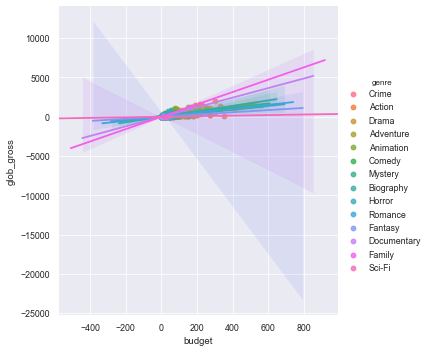

In [19]:
# Percent return per investment per genre